In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import pickle

In [4]:
dataTrain = pd.read_csv(r'C:\Users\Thenuka Jayarathna\Documents\Programming\ICBT_FINAL_PROJECT\House-Value-Prediction-2\MLApplications\Datasets\train.csv')
dataTrain.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
dataTest = pd.read_csv(r'C:\Users\Thenuka Jayarathna\Documents\Programming\ICBT_FINAL_PROJECT\House-Value-Prediction-2\MLApplications\Datasets\test.csv')
dataTest.tail()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal
1458,2919,60,RL,74.0,9627,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,11,2006,WD,Normal


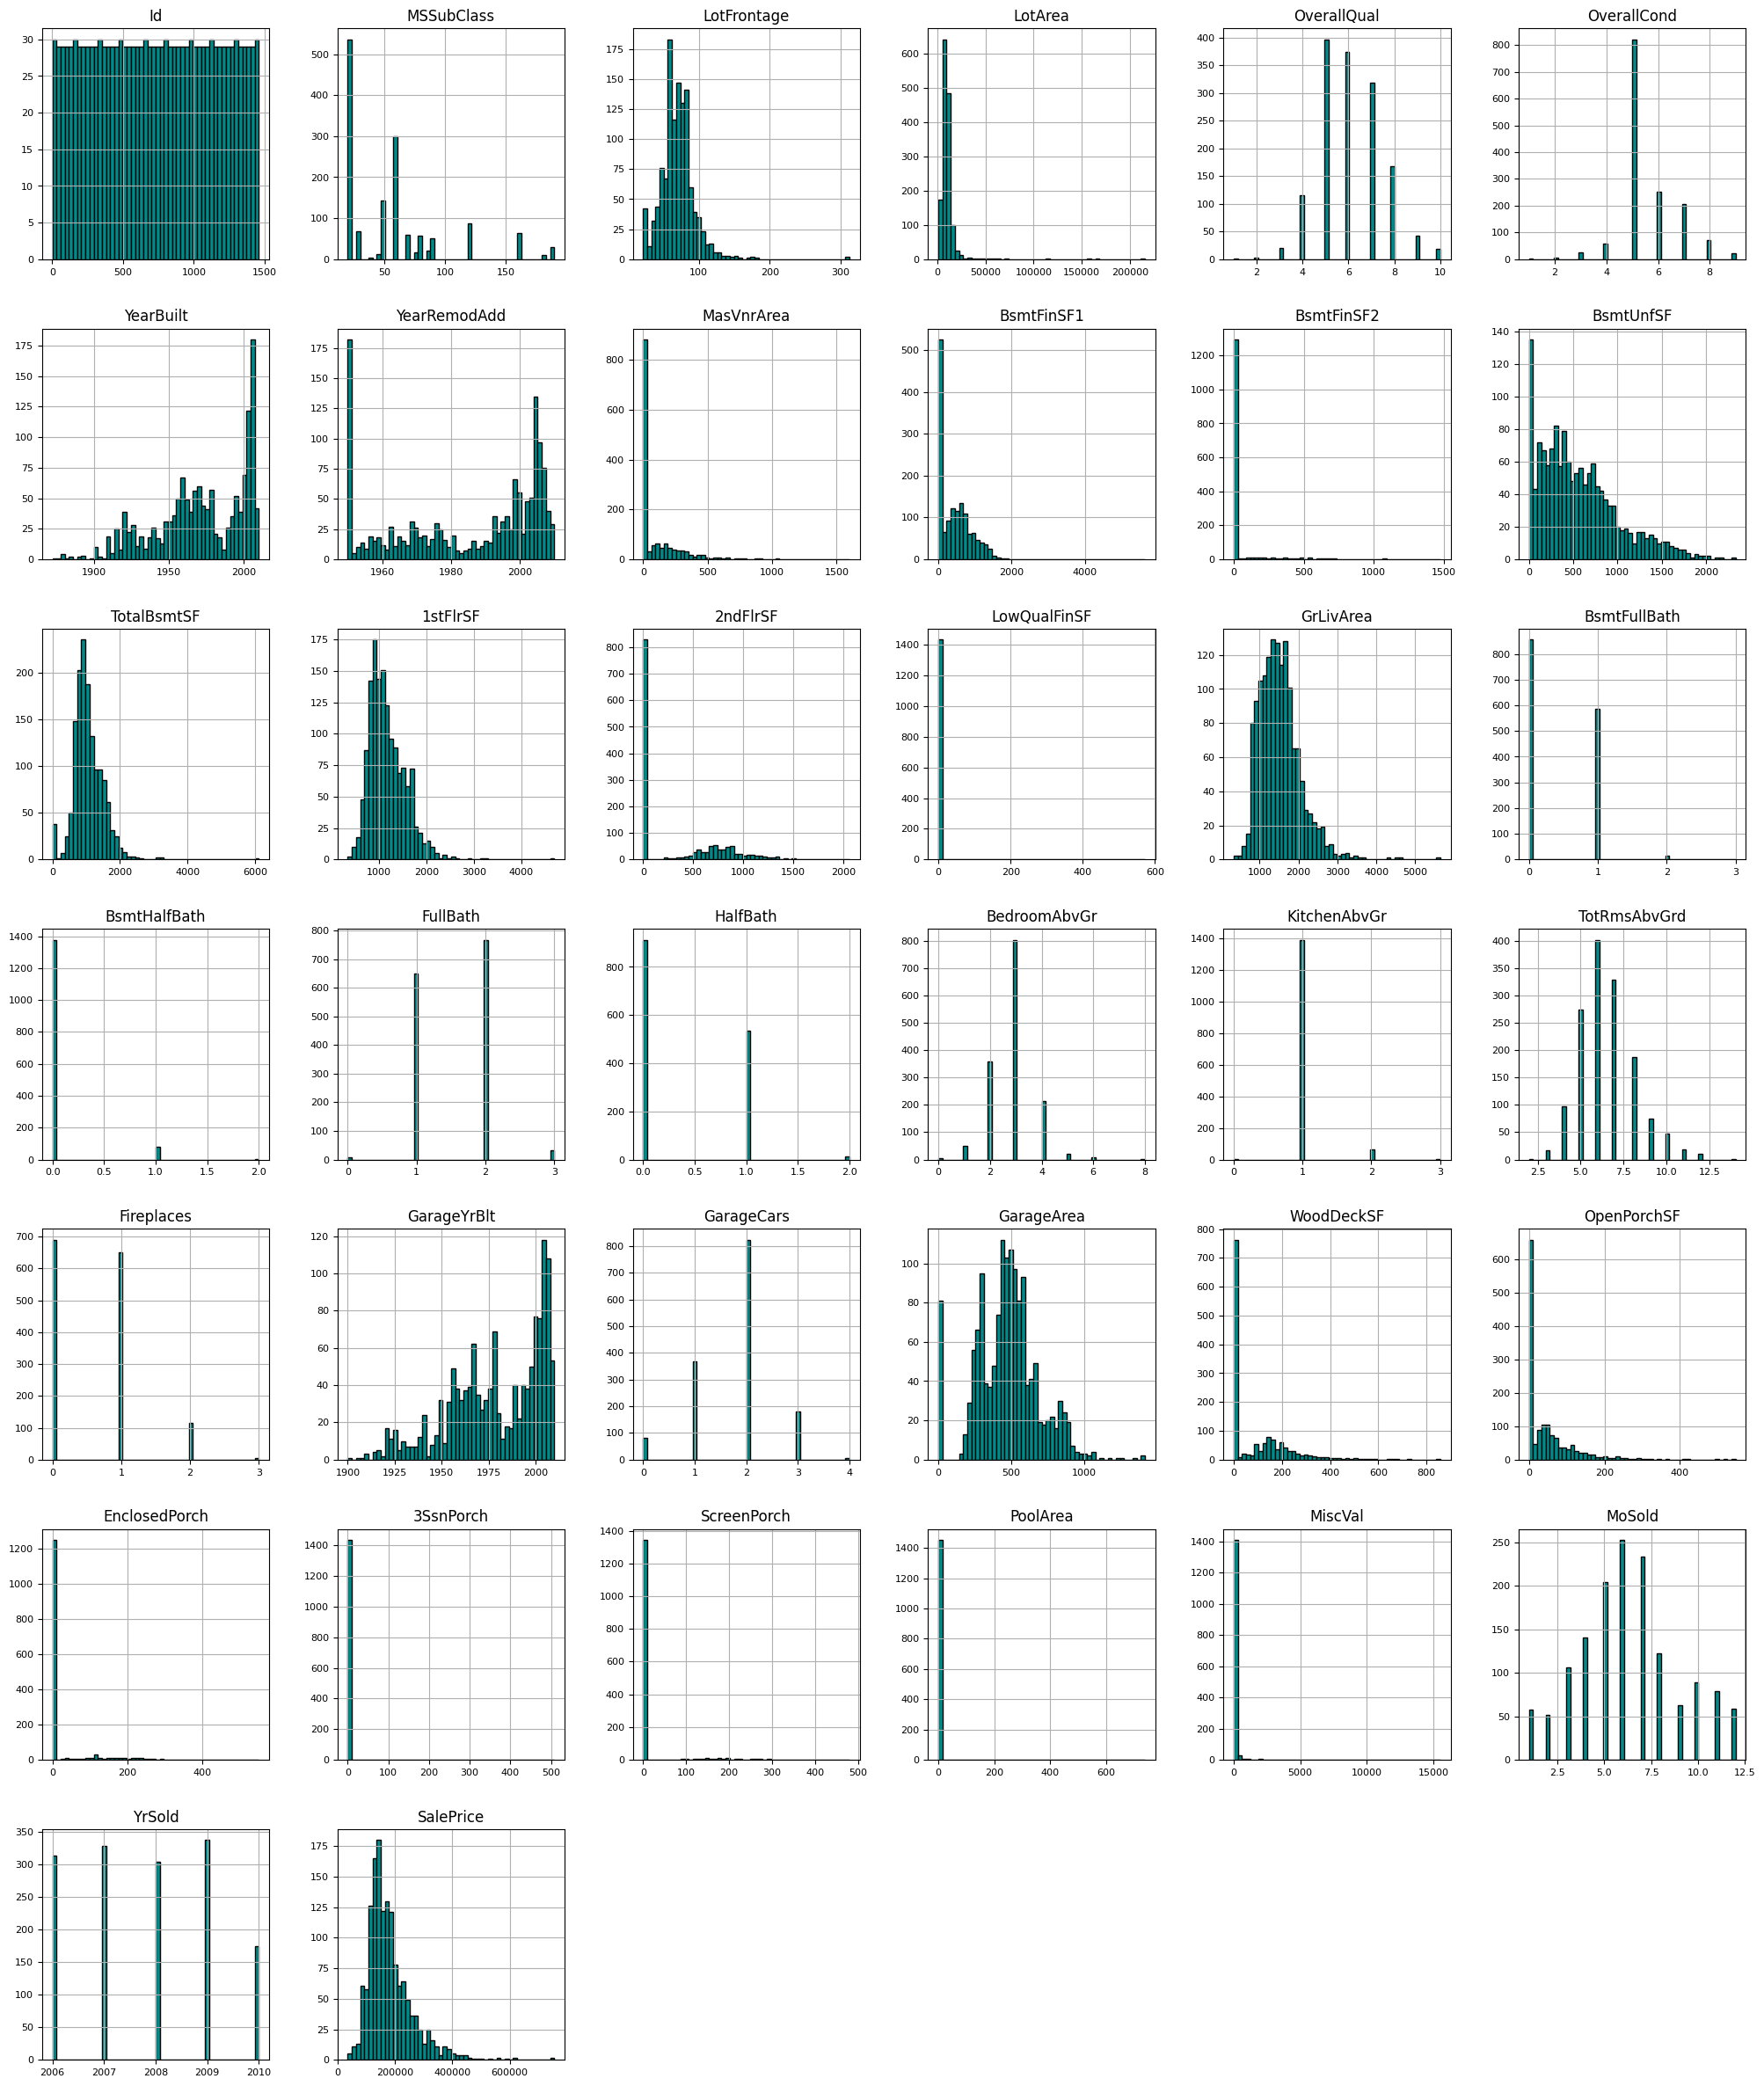

In [6]:
fig_ = dataTrain.hist(figsize=(25, 30), bins=50, color="darkcyan",
                         edgecolor="black", xlabelsize=8, ylabelsize=8)

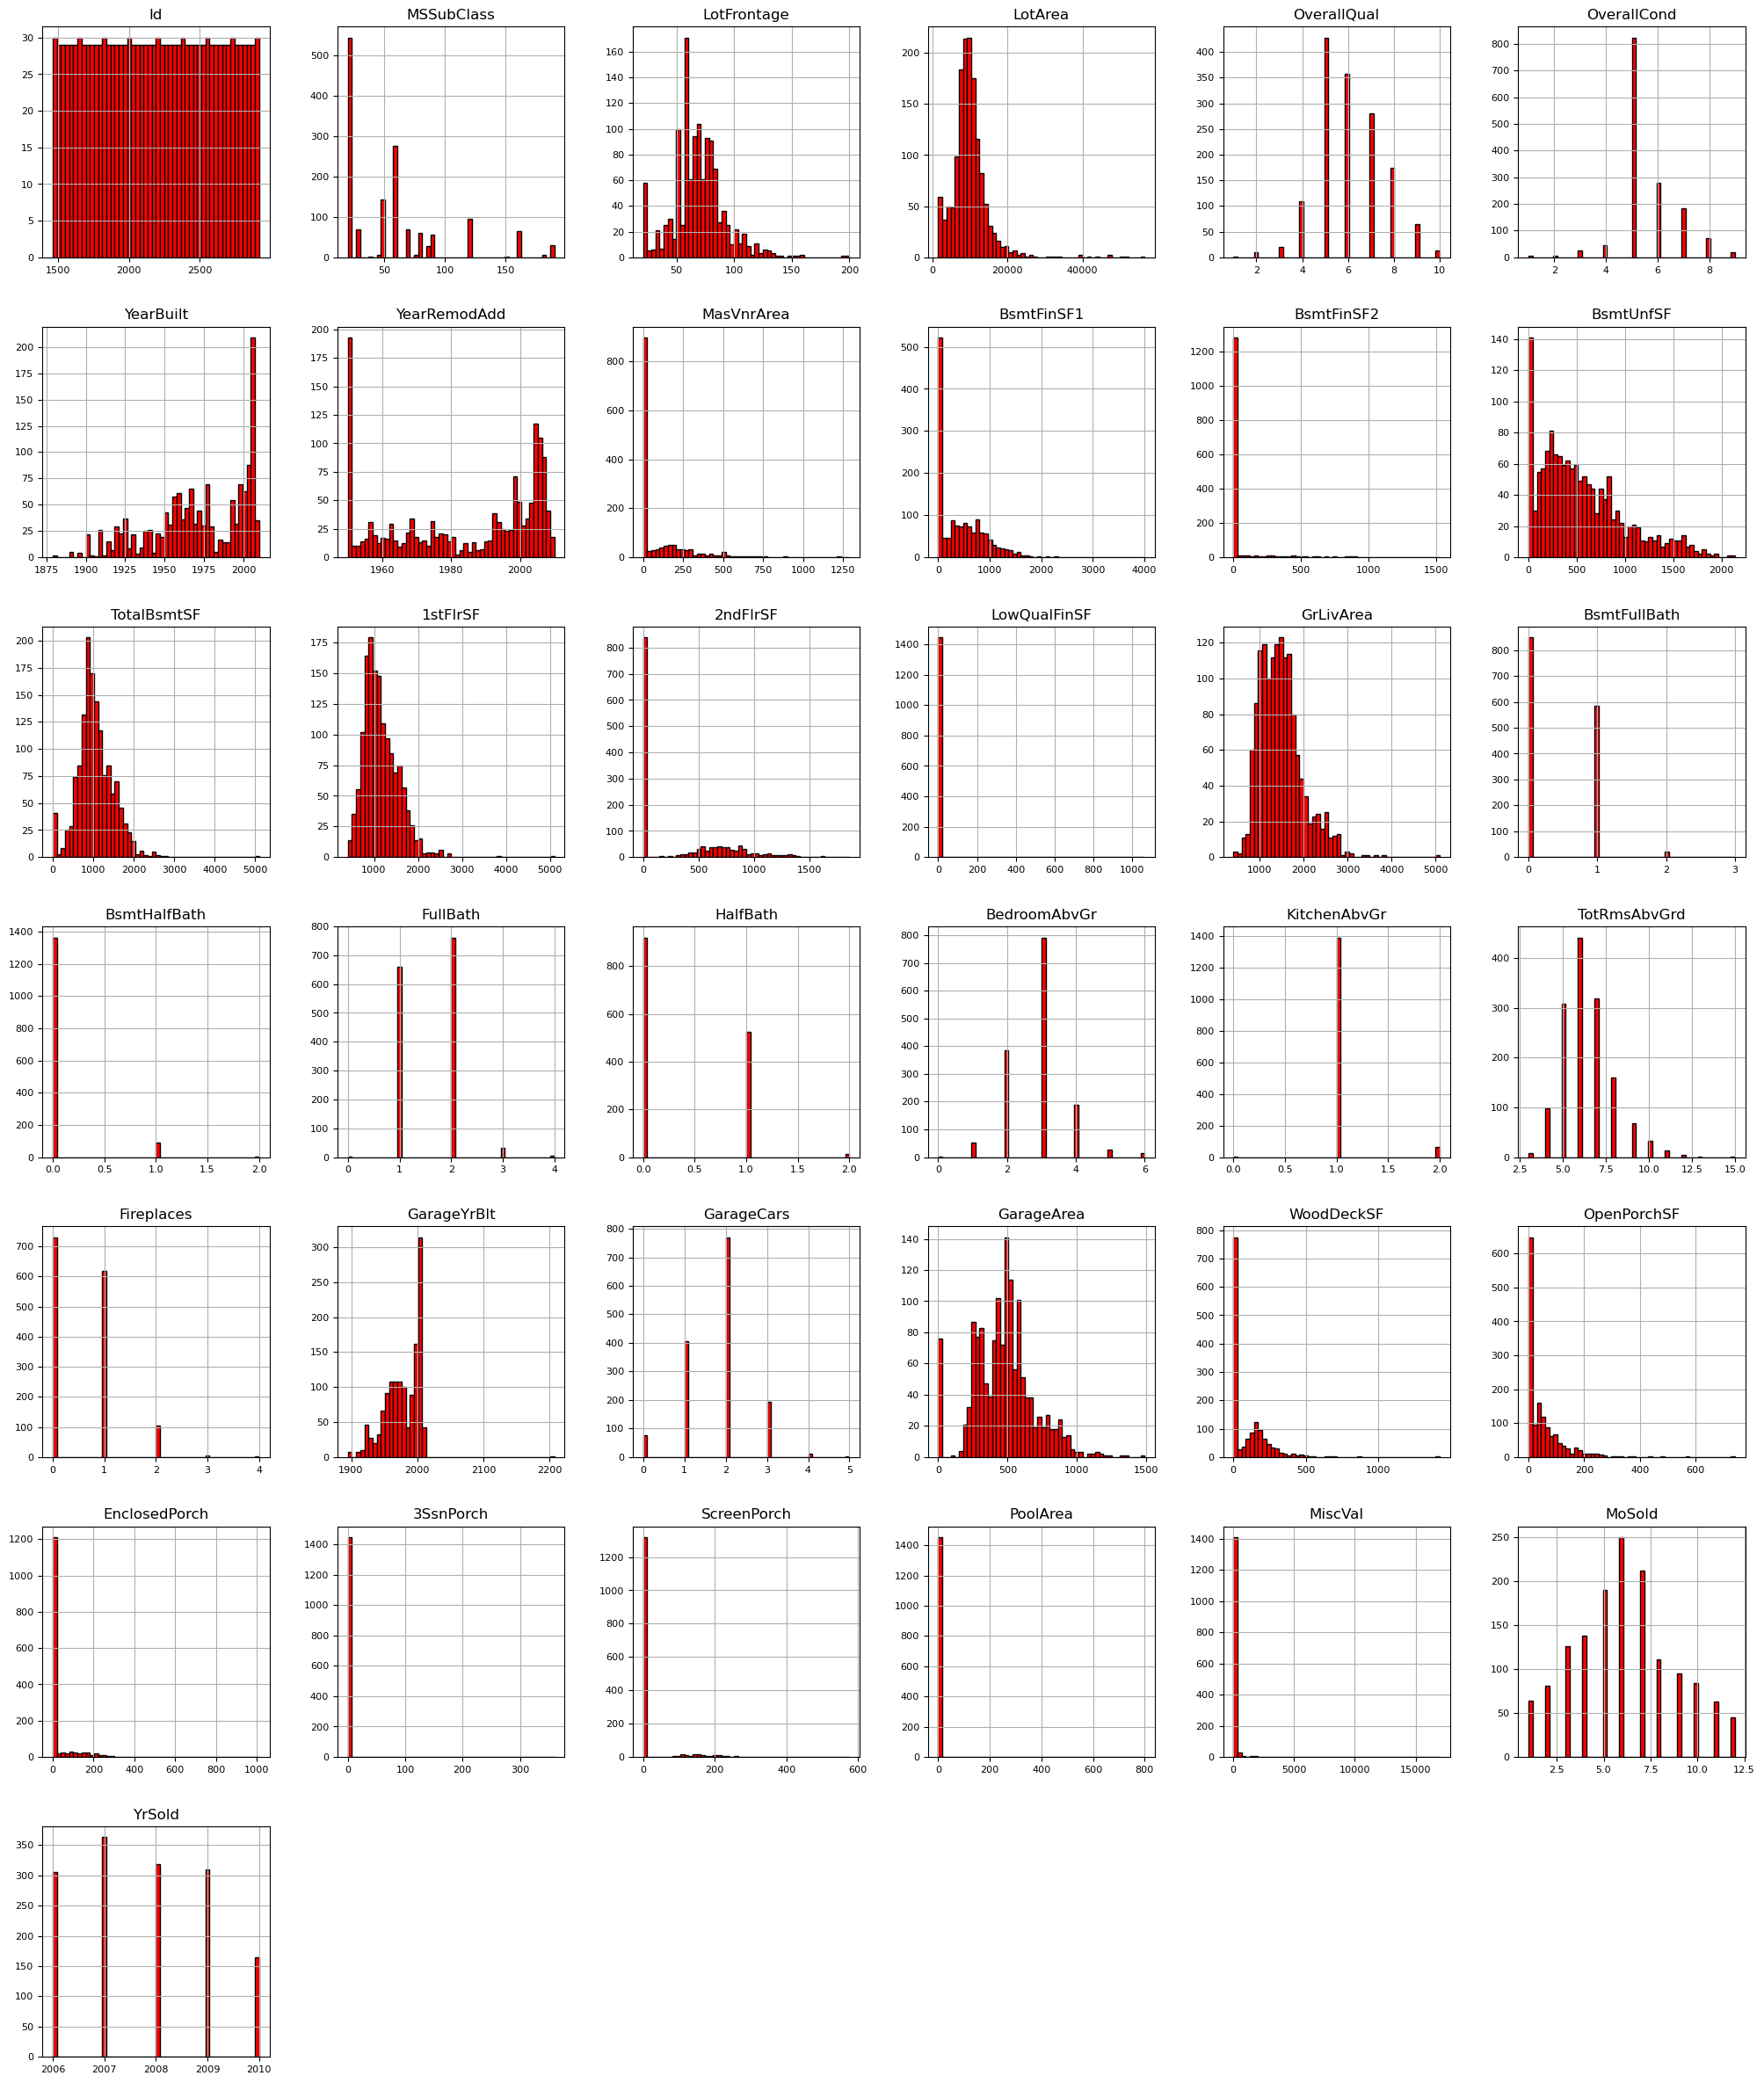

In [6]:
fig_ = dataTest.hist(figsize=(25, 30), bins=50, color="red",
                         edgecolor="black", xlabelsize=8, ylabelsize=8)

#### ***Scatterplot of raw data*** <a id="scatt"></a>

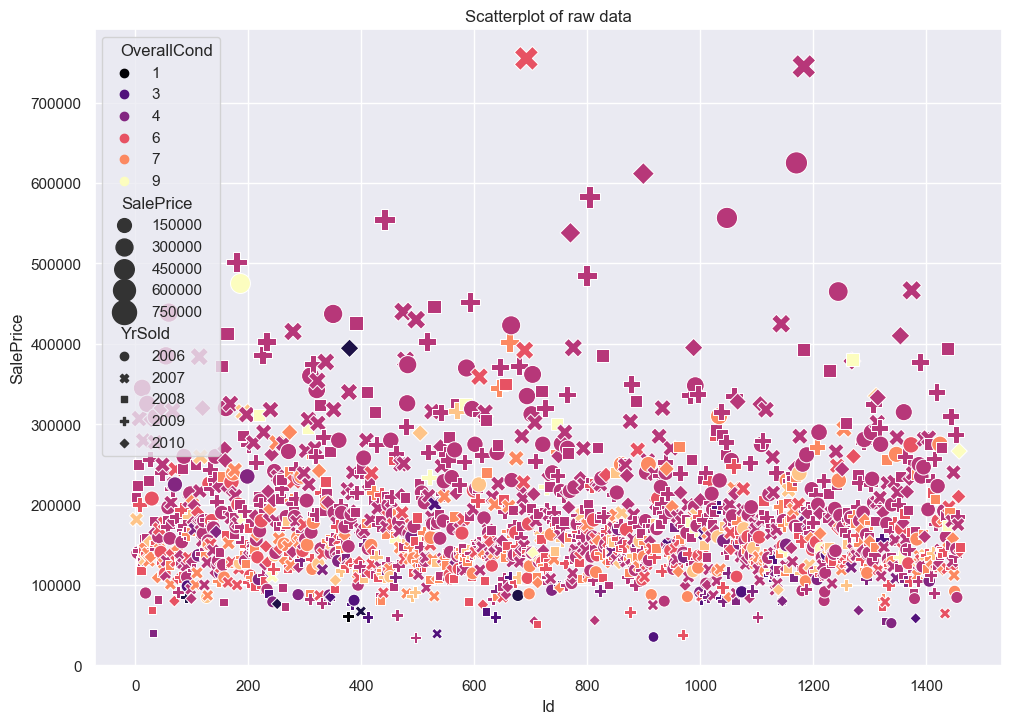

In [7]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.scatterplot(x=dataTrain.Id, y=dataTrain.SalePrice, size=dataTrain.SalePrice, hue=dataTrain.OverallCond, style=dataTrain.YrSold, sizes=(60,300), palette="magma")
plt.title('Scatterplot of raw data')
plt.show()

#### ***Null values heat-map*** <a id="heat"></a>

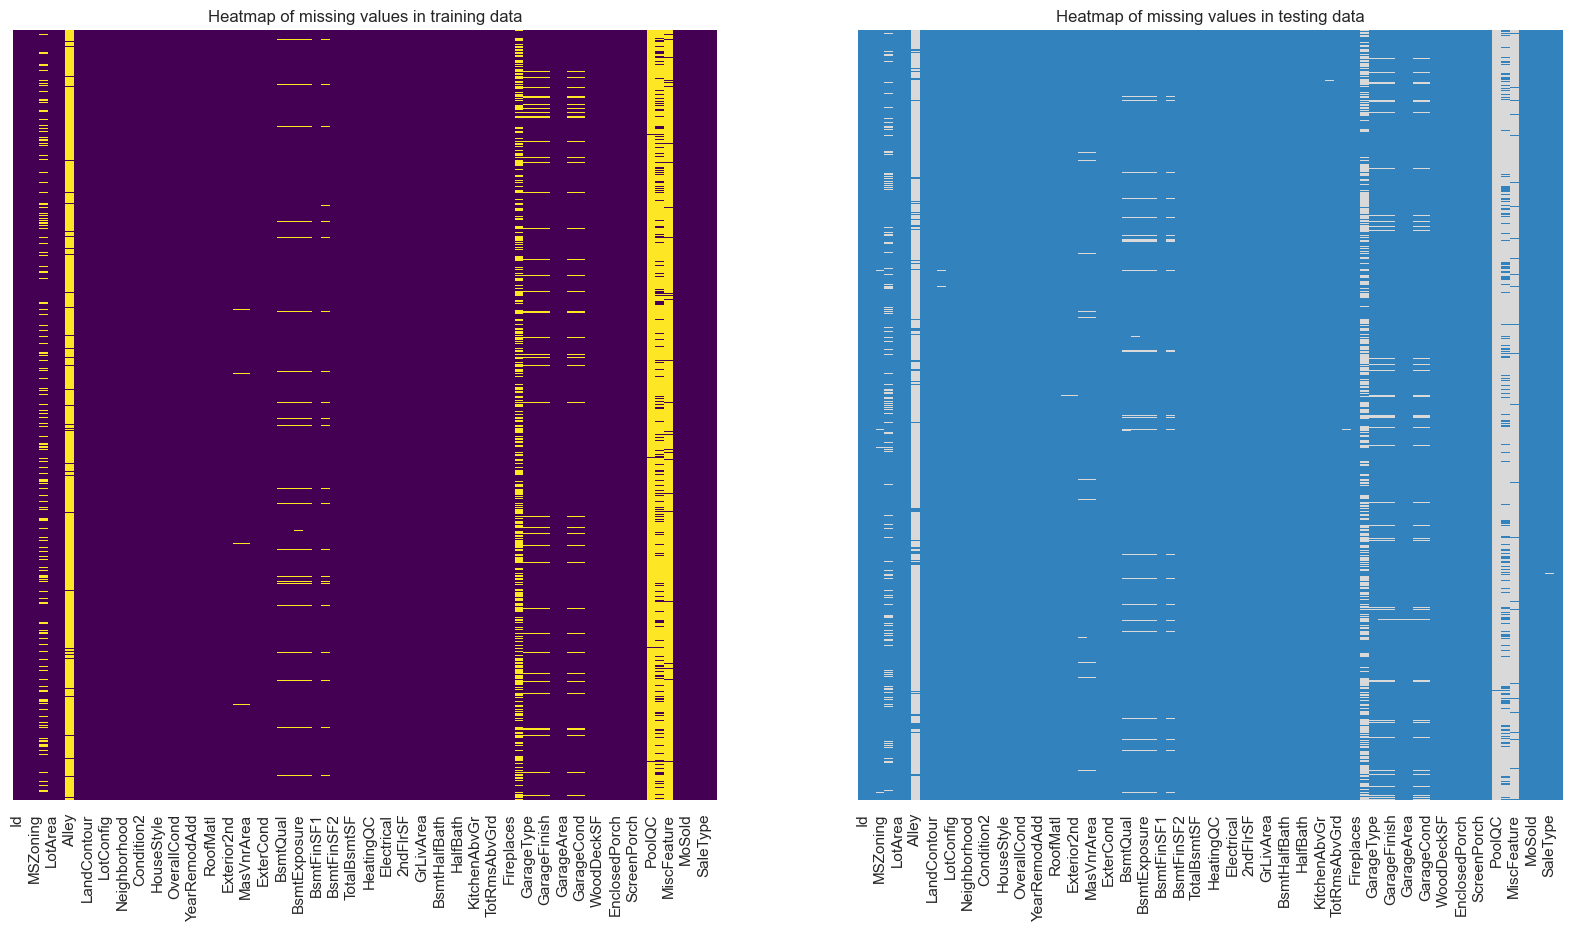

In [8]:
fig, axes = plt.subplots(1, 2, sharex=True, figsize=(20,10))
sns.heatmap(ax=axes[0], yticklabels=False, data=dataTrain.isnull(), cbar=False, cmap="viridis")
sns.heatmap(ax=axes[1], yticklabels=False, data=dataTest.isnull(), cbar=False, cmap="tab20c")
axes[0].set_title('Heatmap of missing values in training data')
axes[1].set_title('Heatmap of missing values in testing data')
plt.show()

#### ***Comparison of Null values between training and testing data*** <a id="barnull"></a>

In [9]:
def show_values(axs, orient="v", space=.01):
    def _single(ax):
        if orient == "v":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() / 2
                _y = p.get_y() + p.get_height() + (p.get_height()*0.01)
                value = '{:.1f}'.format(p.get_height())
                ax.text(_x, _y, value, ha="center") 
        elif orient == "h":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() + float(space)
                _y = p.get_y() + p.get_height() - (p.get_height()*0.5)
                value = '{:.1f}'.format(p.get_width())
                ax.text(_x, _y, value, ha="left")

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _single(ax)
    else:
        _single(axs)

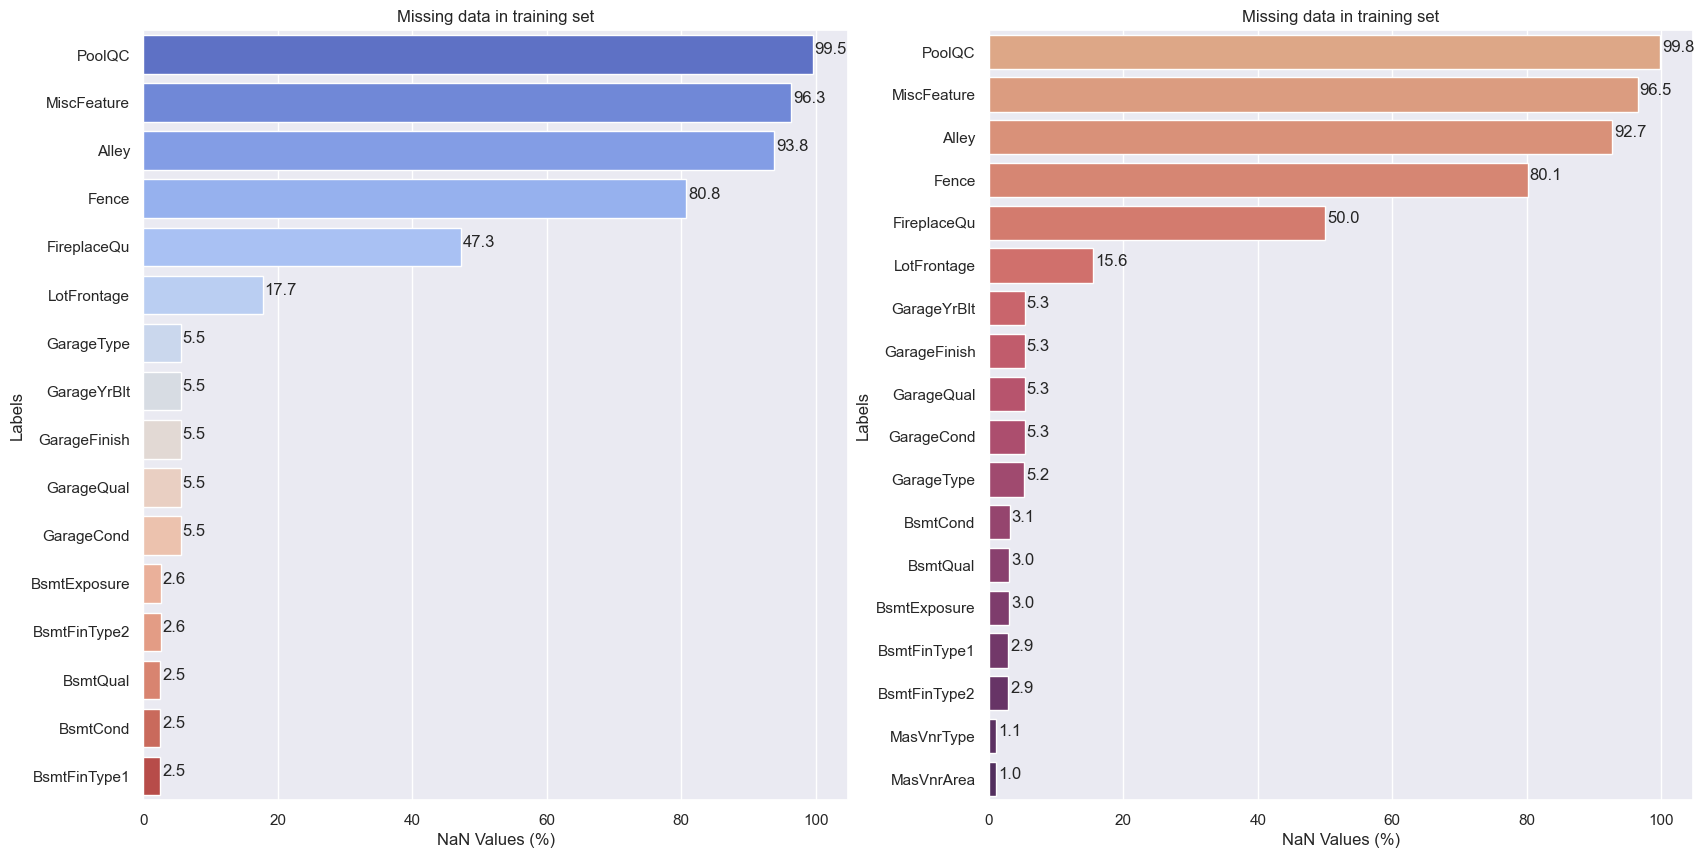

In [10]:
fig, axes = plt.subplots(1, 2, sharex=True, figsize=(20,10))
nanTrain = {}
for column in dataTrain.columns[1:]:
    perc =  dataTrain[column].isna().sum()/len(dataTrain[column])
    if perc >= 0.01:
        nanTrain[str(column)] = perc
nanTrain = {key: value*100 for key, value in sorted(nanTrain.items(), key=lambda item: item[1], reverse=True)}
a = sns.barplot(ax=axes[0], y=list(nanTrain.keys()), x=list(nanTrain.values()), palette="coolwarm", ci=None)
plt.xlabel("NaN Values (%)")
plt.ylabel("Labels")
plt.title('NaN values in training data:')
#===================================================================================================
nanTest = {}
for column in dataTest.columns[1:]:
    perc =  dataTest[column].isna().sum()/len(dataTest[column])
    if perc >= 0.01:
        nanTest[str(column)] = perc
nanTest = {key: value*100 for key, value in sorted(nanTest.items(), key=lambda item: item[1], reverse=True)}
b = sns.barplot(ax=axes[1], y=list(nanTest.keys()), x=list(nanTest.values()), palette="flare", ci=None)

axes[0].set_title('Missing data in training set')
axes[1].set_title('Missing data in training set')
axes[0].set_xlabel('NaN Values (%)')
axes[0].set_ylabel('Labels')
axes[1].set_xlabel('NaN Values (%)')
axes[1].set_ylabel('Labels')

show_values(a, "h", space=0.3)
show_values(b, "h", space=0.3)

plt.show()

<div style="border-radius:10px;
            border : black solid;
            background-color:  	#BDB76B;
            font-size:110%;
            text-align: left">
​
<h2 style='; border:0; border-radius: 10px; font-weight: bold; color:black'><center> Data Pre-processing</center></h2><a id="preprocess"></a>


#### Checking Correlation between labels and the target label.

Text(0.5, 1.0, 'Lables with correlation coefficient > Threshold (0.5)')

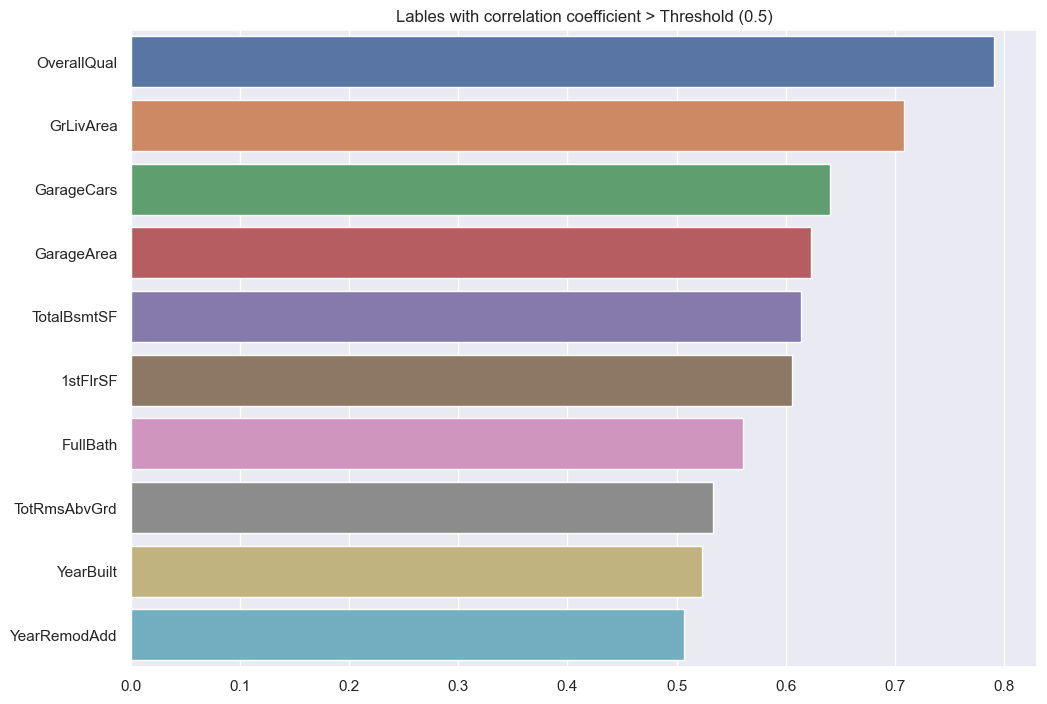

In [11]:
THRESHOLD = 0.5

data = dataTrain.corr()["SalePrice"].sort_values(ascending=False)
indices = data.index
labels = []
corr = []
for i in range(1, len(indices)):
    if data[indices[i]]>THRESHOLD:
        labels.append(indices[i])
        corr.append(data[i])
sns.barplot(x=corr, y=labels)
plt.title('Lables with correlation coefficient > Threshold (0.5)')

#### Dropping the columns that have insignificant correlation with out target variable (unnecessary columns).

In [12]:
unnecessary = []
lab = dataTrain.SalePrice
idCol = dataTest.Id
dataTrain = dataTrain.drop(columns=[str(item) for item in dataTrain.columns[1:] if str(item) not in labels])
dataTest = dataTest.drop(columns=[str(item) for item in dataTest.columns[1:] if str(item) not in labels])
dataTrain = dataTrain.drop(columns=['Id'])
dataTest = dataTest.drop(columns=['Id'])

In [13]:
dataTrain = dataTrain.fillna(method='bfill')
dataTest = dataTest.fillna(method='bfill')

#### Checking if further NaN values persist.

In [14]:
sum(dataTrain.isnull().sum()), sum(dataTest.isnull().sum())

(0, 0)

<div style="border-radius:10px;
            border : black solid;
            background-color:  #FFA500;
            font-size:110%;
            text-align: left">
​
<h2 style='; border:0; border-radius: 10px; font-weight: bold; color:black'><center> Splitting data into x (Values) and y (labels)</center></h2><a id="split"></a>



In [15]:
yTrain = lab
xTest = dataTest.to_numpy()
xTrain = dataTrain.to_numpy()

xTrain.shape, yTrain.shape, xTest.shape

((1460, 10), (1460,), (1459, 10))

**Random Forest**<a id="rf"></a>


In [16]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(max_depth=15)
model.fit(xTrain,yTrain)
preds = model.predict(xTrain)
print('R2 Score: ', sklearn.metrics.r2_score(yTrain,preds)) 

R2 Score:  0.9996464029137898


In [17]:
xTrain.shape

(1460, 10)

In [18]:
Final = pd.DataFrame(columns=["Id","SalePrice"])
Final["Id"] = idCol
Final["SalePrice"] = model.predict(xTest)
Final["Id"] = Final["Id"].astype(int)
Final

,Id,SalePrice
0,1461,110000
1,1462,150000
2,1463,181000
3,1464,181000
4,1465,180000
...,...,...
1454,2915,88000
1455,2916,75000
1456,2917,148000
1457,2918,93500


In [26]:
#pickle.dump(model, open('house_value_prediction_RF01.h5', 'wb'))

In [19]:
xTest

array([[5.000e+00, 1.961e+03, 1.961e+03, ..., 5.000e+00, 1.000e+00,
        7.300e+02],
       [6.000e+00, 1.958e+03, 1.958e+03, ..., 6.000e+00, 1.000e+00,
        3.120e+02],
       [5.000e+00, 1.997e+03, 1.998e+03, ..., 6.000e+00, 2.000e+00,
        4.820e+02],
       ...,
       [5.000e+00, 1.960e+03, 1.996e+03, ..., 7.000e+00, 2.000e+00,
        5.760e+02],
       [5.000e+00, 1.992e+03, 1.992e+03, ..., 6.000e+00, 0.000e+00,
        0.000e+00],
       [7.000e+00, 1.993e+03, 1.994e+03, ..., 9.000e+00, 3.000e+00,
        6.500e+02]])

In [20]:
dataTest

,OverallQual,YearBuilt,YearRemodAdd,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,GarageCars,GarageArea
0,5,1961,1961,882.0,896,896,1,5,1.0,730.0
1,6,1958,1958,1329.0,1329,1329,1,6,1.0,312.0
2,5,1997,1998,928.0,928,1629,2,6,2.0,482.0
3,6,1998,1998,926.0,926,1604,2,7,2.0,470.0
4,8,1992,1992,1280.0,1280,1280,2,5,2.0,506.0
...,...,...,...,...,...,...,...,...,...,...
1454,4,1970,1970,546.0,546,1092,1,5,0.0,0.0
1455,4,1970,1970,546.0,546,1092,1,6,1.0,286.0
1456,5,1960,1996,1224.0,1224,1224,1,7,2.0,576.0
1457,5,1992,1992,912.0,970,970,1,6,0.0,0.0
